# This notebook will be used for the Capstone project for the IBM Data Science course on Coursera

In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import preprocessing, svm, metrics, ensemble, tree
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#from six import StringIO

#import pydotplus
#import graphviz

In [3]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [4]:
# df = pd.DataFrame()

In [5]:
import os
os.getcwd()
#('/home/dsxuser/work/Data-Collisions.csv')

'/home/dsxuser/work'

In [6]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [7]:
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [8]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [9]:
df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


In [10]:
# Variable for dropping of unwanted columns
coldat = df.drop(columns = ['OBJECTID', 'SEVERITYCODE.1', 'REPORTNO', 'INCKEY', 'COLDETKEY', 'X', 'Y', 'STATUS','ADDRTYPE',
              'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYDESC', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
              'SDOT_COLDESC', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'PEDCOUNT', 'PEDCYLCOUNT',
              'PERSONCOUNT', 'VEHCOUNT', 'COLLISIONTYPE', 'SPEEDING', 'UNDERINFL', 'INATTENTIONIND'])

# We will be labelling the different varibales which we will use for analysis
#we will only consider 3 variables for our ease - WEATHER, ROAD, LIGHT

# Convert column to a category variable
# We will assign a new varibale for all our Categorical Attributes for our analysis
coldat["ROADCOND"] = coldat["ROADCOND"].astype('category')
coldat["WEATHER"] = coldat["WEATHER"].astype('category')
coldat["LIGHTCOND"] = coldat["LIGHTCOND"].astype('category')

coldat["ROADCOND_CATG"] = coldat["ROADCOND"].cat.codes
coldat["WEATHER_CATG"] = coldat["WEATHER"].cat.codes
coldat["LIGHTCOND_CATG"] = coldat["LIGHTCOND"].cat.codes

#here we get all variables which we will be considering for our purpose
coldat.dtypes

SEVERITYCODE         int64
WEATHER           category
ROADCOND          category
LIGHTCOND         category
ROADCOND_CATG         int8
WEATHER_CATG          int8
LIGHTCOND_CATG        int8
dtype: object

In [11]:
#we get the first five rows of the result
coldat.head(5)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ROADCOND_CATG,WEATHER_CATG,LIGHTCOND_CATG
0,2,Overcast,Wet,Daylight,8,4,5
1,1,Raining,Wet,Dark - Street Lights On,8,6,2
2,1,Overcast,Dry,Daylight,0,4,5
3,1,Clear,Dry,Daylight,0,1,5
4,2,Raining,Wet,Daylight,8,6,5


In [12]:
#we will consider the count of Severity Code to ensure that we have a balanced data
coldat["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [13]:
coldat["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [14]:
coldat["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [15]:
coldat["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [16]:
from sklearn.utils import resample

In [17]:
# We will now balance the dataset to ensure we have equal representation
# Seperate Severity class 1 and class2 
coldat_class1 = coldat[coldat.SEVERITYCODE==1]
coldat_class2 = coldat[coldat.SEVERITYCODE==2]

#Resample class1 - property damage
coldat_class1_resampled = resample(coldat_class1,
                                        replace=False,
                                        n_samples=58188,
                                        random_state=123)

# Combine class2 with downsample class1 data
#Now the balanced data is stored in a combined variable coldata_bal
coldat_bal = pd.concat([coldat_class1_resampled, coldat_class2])

# Display new class counts through new balanced variable
coldat_bal.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [18]:
len(coldat_bal)

116376

In [19]:
coldat_bal.head(10)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ROADCOND_CATG,WEATHER_CATG,LIGHTCOND_CATG
25055,1,Raining,Wet,Dark - Street Lights On,8,6,2
65280,1,Clear,Dry,Daylight,0,1,5
86292,1,Unknown,Unknown,Unknown,7,10,8
155111,1,Clear,Dry,Daylight,0,1,5
64598,1,Clear,Dry,Daylight,0,1,5
119954,1,Clear,Dry,Daylight,0,1,5
64063,1,Clear,Dry,Daylight,0,1,5
105379,1,Clear,Dry,Daylight,0,1,5
181211,1,NaN,NaN,NaN,-1,-1,-1
187708,1,Clear,Dry,Daylight,0,1,5


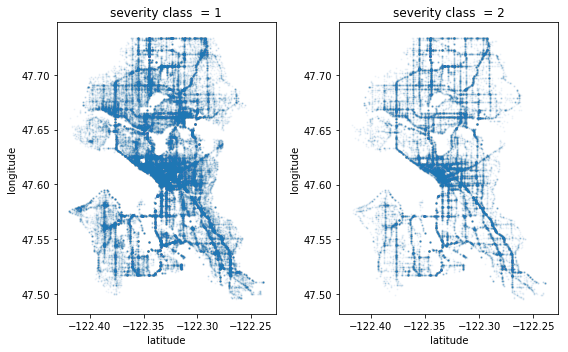

In [20]:
fig, axs = plt.subplots(1,2, figsize=(8,5))
for (ax, (code, d)) in zip(axs, df.groupby('SEVERITYCODE')):
    ax.scatter(d.X, d.Y, s=1, alpha=.05)
    ax.set(xlabel='latitude', ylabel='longitude', title='severity class  = {}'.format(code))

plt.tight_layout()

,Severity Counts,Severity Percentage
Property Damage Only Collision,136485,70.109877
Injury Collision,58188,29.890123


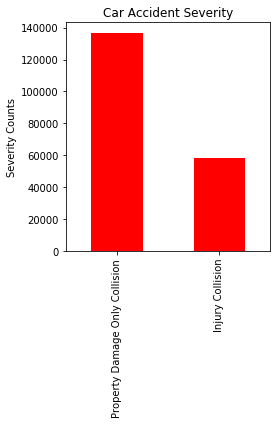

In [21]:
# To understand the count of class1 and class2 and their percentages
df[['SEVERITYCODE', 'SEVERITYDESC']].drop_duplicates().sort_values('SEVERITYCODE') #.style.hide_index()
tot_coll = df['SEVERITYDESC'].value_counts().sum()

df_count_coll = df['SEVERITYDESC'].value_counts().to_frame("Severity Counts")
df_percentage_coll = (df['SEVERITYDESC'].value_counts()/tot_coll*100).to_frame("Severity Percentage")

fig, ax = plt.subplots(figsize=(4,6))

ax = df['SEVERITYDESC'].value_counts().plot.bar(color='r');
ax.set(ylabel='Severity Counts', title='Car Accident Severity')
plt.tight_layout()

df_count_coll.join(df_percentage_coll)

,Collision Counts,Percentage of collisions
Parked Car,47987,25.287060
Angles,34674,18.271688
Rear Ended,34090,17.963946
Other,23703,12.490449
Sideswipe,18609,9.806133
Left Turn,13703,7.220884
Pedestrian,6608,3.482128
Cycles,5415,2.853469
Right Turn,2956,1.557683
Head On,2024,1.066560


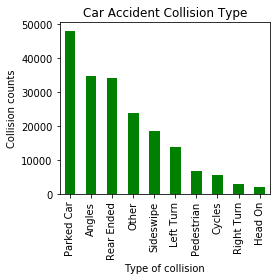

In [22]:
fig, ax = plt.subplots(figsize=(4,4))
df['COLLISIONTYPE'].value_counts().plot.bar(ax=ax, color='g')
ax.set(ylabel='Collision counts', xlabel='Type of collision', title='Car Accident Collision Type')
plt.tight_layout()
# plt.savefig('images/collision_type_vs_counts.png')

df_colltyp_counts = df['COLLISIONTYPE'].value_counts().to_frame("Collision Counts")
df_colltyp_perc = (pd.value_counts(df['COLLISIONTYPE'])/pd.value_counts(df['COLLISIONTYPE']).sum()*100).to_frame("Percentage of collisions")
df_colltyp_counts.join(df_colltyp_perc)

,Junction Accident Counts,Junction Accident Percentage
Mid-Block (not related to intersection),89800,47.678716
At Intersection (intersection related),62810,33.348554
Mid-Block (but intersection related),22790,12.100200
Driveway Junction,10671,5.665697
At Intersection (but not related to intersection),2098,1.113919
Ramp Junction,166,0.088137
Unknown,9,0.004778


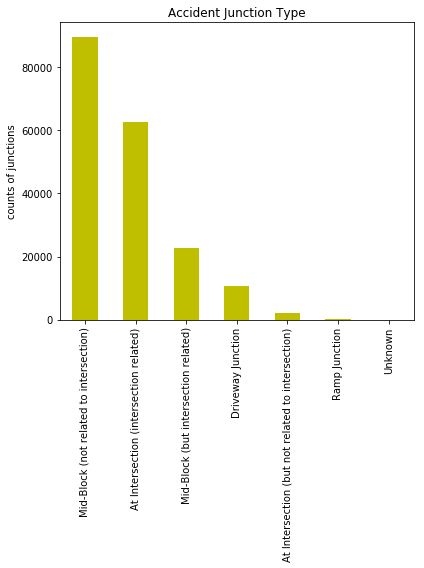

In [23]:
fig, ax = plt.subplots(figsize=(6,8))
df['JUNCTIONTYPE'].value_counts().plot.bar(ax=ax, color='y')
ax.set(ylabel='counts of junctions', title='Accident Junction Type')
plt.tight_layout()
# plt.savefig('images/junctiontype_vs_counts.png')

df_jtype_counts = df['JUNCTIONTYPE'].value_counts().to_frame("Junction Accident Counts")
df_jtype_perc = (pd.value_counts(df['JUNCTIONTYPE'])/pd.value_counts(df['JUNCTIONTYPE']).sum()*100).to_frame("Junction Accident Percentage")
df_jtype_counts.join(df_jtype_perc)

,Road Condition Counts,Road Condition Percentage
Dry,124510,65.648710
Wet,47474,25.030976
Unknown,15078,7.949974
Ice,1209,0.637453
Snow/Slush,1004,0.529366
Other,132,0.069598
Standing Water,115,0.060635
Sand/Mud/Dirt,75,0.039544
Oil,64,0.033744


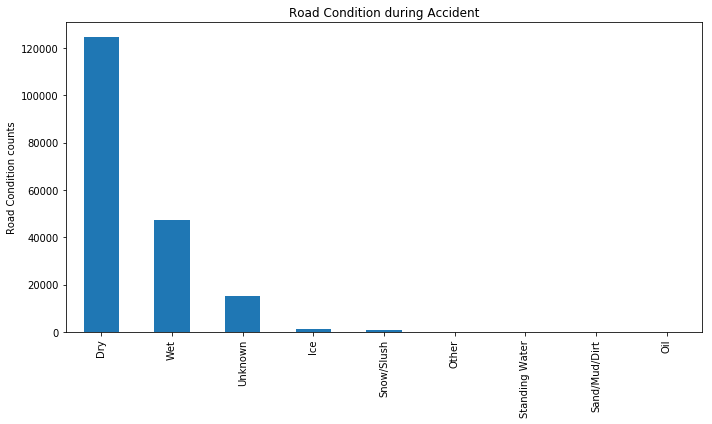

In [24]:
fig, ax = plt.subplots(figsize=(10,6))

ax = df['ROADCOND'].value_counts().plot.bar();
ax.set(ylabel='Road Condition counts', title='Road Condition during Accident' )
plt.tight_layout()

df_roadcondtn_counts = df['ROADCOND'].value_counts().to_frame("Road Condition Counts")
df_roadcondtn_perc = (pd.value_counts(df['ROADCOND'])/pd.value_counts(df['ROADCOND']).sum()*100).to_frame("Road Condition Percentage")
df_roadcondtn_counts.join(df_roadcondtn_perc)

,Weather Condition Counts,Weather condition Percentage
Clear,111135,58.617980
Raining,33145,17.482278
Overcast,27714,14.617705
Unknown,15091,7.959724
Snowing,907,0.478396
Other,832,0.438837
Fog/Smog/Smoke,569,0.300118
Sleet/Hail/Freezing Rain,113,0.059602
Blowing Sand/Dirt,56,0.029537
Severe Crosswind,25,0.013186


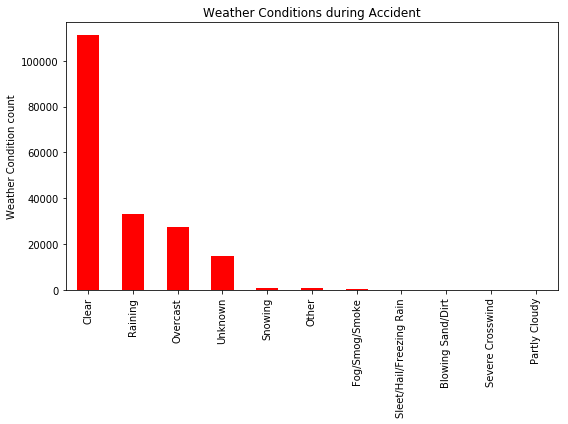

In [25]:
fig, ax = plt.subplots(figsize=(8,6))

ax = df['WEATHER'].value_counts().plot.bar(ax=ax, color='r');
ax.set(ylabel='Weather Condition count', title='Weather Conditions during Accident' )
plt.tight_layout()

df_wtr_cnt = df['WEATHER'].value_counts().to_frame("Weather Condition Counts")
df_wtr_perc = (pd.value_counts(df['WEATHER'])/pd.value_counts(df['WEATHER']).sum()*100).to_frame("Weather condition Percentage")
df_wtr_cnt.join(df_wtr_perc)

,Counts of Light Condition,Light Condition Percentage
Daylight,116137,61.285046
Dark - Street Lights On,48507,25.596956
Unknown,13473,7.109650
Dusk,5902,3.114463
Dawn,2502,1.320296
Dark - No Street Lights,1537,0.811069
Dark - Street Lights Off,1199,0.632708
Other,235,0.124009
Dark - Unknown Lighting,11,0.005805


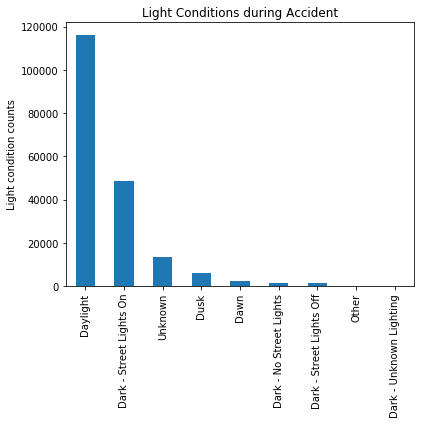

In [26]:
fig, ax = plt.subplots(figsize=(6,6))

ax = df['LIGHTCOND'].value_counts().plot.bar();
ax.set(ylabel='Light condition counts', title='Light Conditions during Accident' )
plt.tight_layout()

df_ltcond_cnt = df['LIGHTCOND'].value_counts().to_frame("Counts of Light Condition")
df_ltcond_per = (pd.value_counts(df['LIGHTCOND'])/pd.value_counts(df['LIGHTCOND']).sum()*100).to_frame("Light Condition Percentage")
df_ltcond_cnt.join(df_ltcond_per)

In [27]:
#catg_col = ['ROADCOND_CATG', 'LIGHTCOND_CATG', 'WEATHER_CATG']
#num_col  = ['SEVERITYCODE'] #ROADCOND_CATG', 'WEATHER_CATG', 'LIGHTCOND_CATG']
#all_cols = catg_col + num_col
#print('This Project Modeling will be based on:')
#for c in catg_col:
#    print('***** {}:=> {}'.format(c, df[c].unique()))
#for c in num_col:
#    print('* {}'.format(c))
#col_trans = make_column_transformer(
#    (OneHotEncoder(handle_unknown='ignore'), catg_col), 
#    (RobustScaler(), num_col),
#)
#import numpy as np
#import pandas as pd
#df.count()
#X = col_trans.fit_transform(df[all_cols])

In [28]:
import numpy as np
X = np.asarray(coldat_bal[['ROADCOND_CATG', 'WEATHER_CATG', 'LIGHTCOND_CATG']])
X[0:5]

array([[ 8,  6,  2],
       [ 0,  1,  5],
       [ 7, 10,  8],
       [ 0,  1,  5],
       [ 0,  1,  5]], dtype=int8)

In [29]:
len(X)

116376

In [30]:
import numpy as np
y = np.asarray(coldat_bal['SEVERITYCODE'])
y[0:5]

array([1, 1, 1, 1, 1])

In [31]:
len(y)

116376

In [32]:
from sklearn.preprocessing import StandardScaler
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.52797946,  1.15236718, -1.21648407],
       [-0.67084969, -0.67488   ,  0.42978835],
       [ 1.25312582,  2.61416492,  2.07606076],
       [-0.67084969, -0.67488   ,  0.42978835],
       [-0.67084969, -0.67488   ,  0.42978835]])

In [33]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
# Training Set = 70%
#print ('Training set:', x_train.shape,  y_train.shape)
# Training Set = 30%
#print ('Testing set:', x_test.shape,  y_test.shape)

In [34]:
#import numpy as np
#from sklearn.model_selection import train_test_split
#X, y = np.arange(10).reshape((5, 2)), range(5)
X
#array([[0, 1],
#       [2, 3],
#       [4, 5],
#       [6, 7],
#       [8, 9]])
#list(y)
#[0, 1, 2, 3, 4]

array([[ 1.52797946,  1.15236718, -1.21648407],
       [-0.67084969, -0.67488   ,  0.42978835],
       [ 1.25312582,  2.61416492,  2.07606076],
       ...,
       [-0.67084969, -0.67488   ,  0.42978835],
       [-0.67084969, -0.67488   ,  0.42978835],
       [-0.67084969, -0.67488   ,  0.97854582]])

In [35]:
list(y)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42)

#X_train 
#array([[4, 5],
#       [0, 1],
#       [6, 7]])
#y_train
#[2, 0, 3]

#X_test
#array([[2, 3],
#       [8, 9]])
#y_test
#[1, 4]

In [37]:
X_train

array([[ 1.52797946,  0.42146831, -1.21648407],
       [-0.67084969, -0.67488   ,  0.42978835],
       [-0.67084969, -0.67488   ,  0.42978835],
       ...,
       [ 1.52797946,  1.15236718, -1.21648407],
       [-0.67084969, -0.67488   ,  0.42978835],
       [-0.67084969, -0.67488   ,  0.42978835]])

In [38]:
y_train

array([2, 1, 1, ..., 2, 1, 1])

In [39]:
X_test

array([[-0.94570333, -1.40577887, -2.86275649],
       [ 1.52797946,  1.15236718, -0.11896913],
       [-0.67084969, -0.67488   ,  0.42978835],
       ...,
       [-0.67084969, -0.67488   , -1.21648407],
       [-0.67084969, -0.67488   ,  0.42978835],
       [ 1.25312582,  2.61416492,  0.42978835]])

In [40]:
y_test

array([1, 1, 2, ..., 1, 1, 1])

In [41]:
train_test_split(y, shuffle=False)

[array([1, 1, 1, ..., 2, 2, 2]), array([2, 2, 2, ..., 2, 2, 2])]

In [42]:
print ('Training set:', X_train.shape,  y_train.shape)
print ('Testing set:', X_test.shape,  y_test.shape)

Training set: (81463, 3) (81463,)
Testing set: (34913, 3) (34913,)


### K-Nearest Neighbors (KNN)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
k = 25

In [44]:
#Train Model & Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

Kyhat = neigh.predict(X_test)
Kyhat[0:5]

array([1, 1, 1, 1, 1])

### Decision Tree

In [45]:
# Building the Decision Tree
from sklearn.tree import DecisionTreeClassifier
colDataTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
colDataTree
colDataTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
# Train Model & Predict
dtyhat = colDataTree.predict(X_test)
print (dtyhat [0:5])
print (y_test [0:5])

[1 2 2 2 2]
[1 1 2 1 1]


### Logistic Regression

In [47]:
# Building the linear regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(C=0.03, solver='liblinear').fit(X_train,y_train)
lr

LogisticRegression(C=0.03, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
# Train Model & Predictor
lryhat = lr.predict(X_test)
print(lryhat)

yhat_prob = lr.predict_proba(X_test)
print(yhat_prob)

[2 1 2 ... 2 2 1]
[[0.40364293 0.59635707]
 [0.53529771 0.46470229]
 [0.46743605 0.53256395]
 ...
 [0.46293233 0.53706767]
 [0.46743605 0.53256395]
 [0.67878612 0.32121388]]


In [49]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [50]:
models = dict([ ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors = 3)),
               ('Linear Regression', LogisticRegression(C=0.03, solver='liblinear')), 
               ('Decision Tree', DecisionTreeClassifier(criterion="entropy", max_depth = 7)),
               ('Random Forest Classification', ensemble.RandomForestClassifier(n_estimators=100, max_depth=10)),
              ])

In [51]:
for name, model in models.items():
    print('Current model = {}'.format(name))
    model.fit(X_train, y_train)

Current model = K-Nearest Neighbors
Current model = Linear Regression
Current model = Decision Tree
Current model = Random Forest Classification


In [52]:
yhat_dict = dict()
yproba_dict = dict()
for name, model in models.items():
    yhat = model.predict(X_test)
    yhat_dict[name] = yhat
    yproba_dict[name] = model.predict_proba(X_test)[:,1]
    print('Classification of different models {}'.format(name))
    print(model)
    print(classification_report(y_test, yhat))
    print()
    print()
    print()

Classification of different models K-Nearest Neighbors
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
              precision    recall  f1-score   support

           1       0.63      0.26      0.37     17619
           2       0.53      0.84      0.65     17294

   micro avg       0.55      0.55      0.55     34913
   macro avg       0.58      0.55      0.51     34913
weighted avg       0.58      0.55      0.51     34913




Classification of different models Linear Regression
LogisticRegression(C=0.03, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           1       0.54      0.35      0.43     17619
           2    

### Results & Checking for our Models
We have till now done the Modelling and fitments 
Now we want to know if our models are accurate or not

##### K-Nearest Neighbor Evaluation

In [53]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, Kyhat)

0.5237017729785467

In [54]:
# F1-Score
f1_score(y_test, Kyhat, average='macro')

0.5196155093297656

##### Decision Tree Evaluation

In [55]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, dtyhat)

0.5626843869045914

In [56]:
# F1-Score
f1_score(y_test, dtyhat, average='macro')

0.5385207275454998

#### Logistic Regression Evaluation

In [57]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, lryhat)

0.523501274596855

In [58]:
# F1-Score
f1_score(y_test, lryhat, average='macro')

0.5098573271706865

In [59]:
# logloss
yhat_prob = lr.predict_proba(X_test)
log_loss(y_test, yhat_prob)

0.6855290309651024

#### Random Forest Classifier Evaluation

In [60]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, yhat)

0.5608226162174548

In [61]:
# F1-Score
f1_score(y_test, lryhat, average='macro')

0.5098573271706865

    |Model              | Jaccard Score    |F1-Score          |Logloss           |
    |-------------------|------------------|------------------|------------------|
    |KNN                |0.5512563468298398|0.5046608485281039|                 0|
    |Decision Tree      |0.5633381070173155|0.5387154848944434|0                 |
    |Logistic Regression|0.5237338888165604|0.5097244174539972|0.6855086422628527|
    |Random Forest      |0.5617497721650827|0.5097244174539972|0                 |

#### Discussion

Initial dataset were very raw in nature where we had to change categorical data of type 'object' into int8 type. Machine Learning algorithms normally accept a data type which is of numerical data type

Later we went onto look at SEVERITYCODE which had uneven data points in the ratio of 43:57 and we had to balance the dataset. we did apply downsampling the majority class(Class 2)sklearn's resample tool. We did a doansampling of the minority class to match to the majority classs

After the analysis of the data points like SEVERITYCODE, WEATHER, LIGHTCOND, ROADCOND etc. we also cleaned the data and balanced the data to be fed through three ML models; K-Nearest Neighbor, Decision Tree and Logistic Regression, Random Forest Classification. Logiscti regression was the best suitable model for the current data

We used the Evaluation metrics like jaccard index, f-1 score and logloss for logistic regression used to test the accuracy of our models were . Choosing different k, max depth and hyperamater C values helped to improve our accuracy to be the best possible.

### Conclusion

Based on dataset we have used for our analysis and after going through several steps of data analysis and fitting them through different machine learning models we can conclude that the weather conditions, road conditions, street light conditions that there are particular weather conditions have impact on whether or travel could result in property damage (class1) or injury (class2). The Seattle government should concentrate on looking at road conditions, street lights conditions and weather predictions with which they can take necessary precautions and measures to ensure that severe car accidents do not occur which will lead to less fatalities and reduce hospitalisation expenses and save many people car damage repairs and unnecessary insurance claims. This will help improvement of infrastructure like road, street maintenance too by other government departments in tackling other civil society needs. These measures in collaboration not only will reduce car accidents severity but also control other factors like waterlogging, road infrastructure, drug menace, crimes, civil harmony. Hence the dataset clearly provides the attributes which need to be concentrated by the civil authorities